In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("/kaggle/input/tomato-reviews/zomato.csv")

In [3]:
zmt = pd.DataFrame(data)

In [4]:
zmt.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [5]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [6]:
zmt.drop(['url','address','phone','reviews_list','dish_liked','menu_item'],axis=1,inplace=True)

In [7]:
zmt.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [8]:
zmt.rename(columns={'name':'Restaurant','rate':'ratings','listed_in(type)':'Type','listed_in(city)':'City','approx_cost(for two people)':'Cost'},inplace=True)

In [9]:
zmt.head()

,Restaurant,online_order,book_table,ratings,votes,location,rest_type,cuisines,Cost,Type,City
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [10]:
zmt.dropna(inplace=True)

In [11]:
zmt.groupby('Restaurant').count().head()

,online_order,book_table,ratings,votes,location,rest_type,cuisines,Cost,Type,City
Restaurant,,,,,,,,,,
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,3,3,3,3,3,3,3,3,3,3


In [12]:
zmt['Restaurant'] = zmt['Restaurant'].str.replace('100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C','',regex=True)


In [13]:
zmt.groupby('Restaurant').count().head()

,online_order,book_table,ratings,votes,location,rest_type,cuisines,Cost,Type,City
Restaurant,,,,,,,,,,
,3,3,3,3,3,3,3,3,3,3
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafe,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6


In [14]:
zmt['Restaurant'] = zmt['Restaurant'].str.replace('Caf-|Caf','Cafe',regex = True)

In [15]:
zmt.groupby('Restaurant').count().head()

,online_order,book_table,ratings,votes,location,rest_type,cuisines,Cost,Type,City
Restaurant,,,,,,,,,,
,3,3,3,3,3,3,3,3,3,3
#FeelTheROLL,2,2,2,2,2,2,2,2,2,2
#L-81 Cafee,9,9,9,9,9,9,9,9,9,9
#refuel,3,3,3,3,3,3,3,3,3,3
1000 B.C,6,6,6,6,6,6,6,6,6,6


In [16]:
zmt['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
zmt['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [18]:
zmt['ratings'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [19]:
replace = lambda x: x.replace('/5', "")
l = []
for val in map(replace, zmt['ratings']):
    if val != 'NEW' and val != '-':
        var = float(val)
    l.append(var)
zmt['ratings'] = l


In [20]:
zmt['ratings'].unique(),zmt['ratings'].dtype

(array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
        4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
        4.8, 4.9, 2.1, 2. , 1.8]),
 dtype('float64'))

In [21]:
zmt['votes'].isnull().value_counts()

votes
False    43533
Name: count, dtype: int64

In [22]:
zmt['location'].unique()

array(['Banashankari', 'Basavanagudi', 'Mysore Road', 'Jayanagar',
       'Kumaraswamy Layout', 'Rajarajeshwari Nagar', 'Vijay Nagar',
       'Uttarahalli', 'JP Nagar', 'South Bangalore', 'City Market',
       'Bannerghatta Road', 'BTM', 'Kanakapura Road', 'Bommanahalli',
       'CV Raman Nagar', 'Electronic City', 'Wilson Garden',
       'Shanti Nagar', 'Koramangala 5th Block', 'Richmond Road', 'HSR',
       'Marathahalli', 'Koramangala 7th Block', 'Bellandur',
       'Sarjapur Road', 'Whitefield', 'East Bangalore',
       'Old Airport Road', 'Indiranagar', 'Koramangala 1st Block',
       'Frazer Town', 'MG Road', 'Brigade Road', 'Lavelle Road',
       'Church Street', 'Ulsoor', 'Residency Road', 'Shivajinagar',
       'Infantry Road', 'St. Marks Road', 'Cunningham Road',
       'Race Course Road', 'Commercial Street', 'Vasanth Nagar', 'Domlur',
       'Koramangala 8th Block', 'Ejipura', 'Jeevan Bhima Nagar',
       'Old Madras Road', 'Seshadripuram', 'Kammanahalli',
       'Koramanga

In [23]:
zmt['rest_type'].unique(),zmt['rest_type'].isnull().value_counts()

(array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
        'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
        'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
        'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
        'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
        'Dessert Parlor, Sweet Shop', 'Bakery, Quick Bites',
        'Sweet Shop, Quick Bites', 'Kiosk', 'Food Truck',
        'Quick Bites, Dessert Parlor', 'Beverage Shop, Quick Bites',
        'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
        'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
        'Quick Bites, Bakery', 'Microbrewery, Casual Dining', 'Lounge',
        'Bar, Casual Dining', 'Food Court', 'Cafe, Bakery', 'Dhaba',
        'Quick Bites, Sweet Shop', 'Microbrewery',
        'Food Court, Quick Bites', 'Quick Bites, Beverage Shop',
        'Pub, Bar', 'Casual Dining, Pub', 'Lounge, Bar',
        'Dessert Parlor, Quick Bites

In [24]:
zmt['cuisines'].unique(),zmt['cuisines'].isnull().value_counts()

(array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
        'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
        'North Indian, Street Food, Biryani',
        'North Indian, Chinese, Arabian, Momos'], dtype=object),
 cuisines
 False    43533
 Name: count, dtype: int64)

In [25]:
zmt['Cost'].unique(),zmt['Cost'].isnull().value_counts()

(array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
        '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
        '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
        '1,600', '230', '130', '1,700', '1,400', '1,350', '2,200', '2,000',
        '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000', '2,800',
        '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400', '2,600',
        '1,450', '70', '3,200', '560', '240', '360', '6,000', '1,050',
        '2,300', '4,100', '120', '5,000', '3,700', '1,650', '2,700',
        '4,500'], dtype=object),
 Cost
 False    43533
 Name: count, dtype: int64)

In [26]:
zmt['Cost'] = zmt['Cost'].apply(lambda x:x.replace(',',"")).astype(int)

In [27]:
zmt['Cost'].unique(),zmt['Cost'].isnull().value_counts()

(array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
         750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
         199,   80, 1100,  160, 1600,  230,  130, 1700, 1400, 1350, 2200,
        2000, 1800, 1900,  180,  330, 2500, 2100, 3000, 2800, 3400,   50,
          40, 1250, 3500, 4000, 2400, 2600, 1450,   70, 3200,  560,  240,
         360, 6000, 1050, 2300, 4100,  120, 5000, 3700, 1650, 2700, 4500]),
 Cost
 False    43533
 Name: count, dtype: int64)

In [28]:
zmt['Cost'].dtype

dtype('int64')

In [29]:
zmt['Type'].unique(),zmt['Type'].isnull().value_counts()

(array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
        'Drinks & nightlife', 'Pubs and bars'], dtype=object),
 Type
 False    43533
 Name: count, dtype: int64)

In [30]:
zmt['City'].unique(),zmt['City'].isnull().value_counts()

(array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
        'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
        'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
        'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
        'Koramangala 4th Block', 'Koramangala 5th Block',
        'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
        'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
        'Old Airport Road', 'Rajajinagar', 'Residency Road',
        'Sarjapur Road', 'Whitefield'], dtype=object),
 City
 False    43533
 Name: count, dtype: int64)

In [31]:
zmt.duplicated().value_counts()

False    43453
True        80
Name: count, dtype: int64

In [32]:
zmt.drop_duplicates(keep='last',inplace=True)

In [33]:
zmt.reset_index(drop=True,inplace=True)

In [34]:
zmt.duplicated().value_counts()

False    43453
Name: count, dtype: int64

In [35]:
zmt

,Restaurant,online_order,book_table,ratings,votes,location,rest_type,cuisines,Cost,Type,City
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafee,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...
43448,The Farm House Bar n Grill,No,No,3.7,34,Whitefield,"Casual Dining, Bar","North Indian, Continental",800,Pubs and bars,Whitefield
43449,Bhagini,No,No,2.5,81,Whitefield,"Casual Dining, Bar","Andhra, South Indian, Chinese, North Indian",800,Pubs and bars,Whitefield
43450,Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,Whitefield,Bar,Continental,1500,Pubs and bars,Whitefield
43451,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,"ITPL Main Road, Whitefield",Bar,Finger Food,2500,Pubs and bars,Whitefield


In [36]:
zmt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43453 entries, 0 to 43452
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Restaurant    43453 non-null  object 
 1   online_order  43453 non-null  object 
 2   book_table    43453 non-null  object 
 3   ratings       43453 non-null  float64
 4   votes         43453 non-null  int64  
 5   location      43453 non-null  object 
 6   rest_type     43453 non-null  object 
 7   cuisines      43453 non-null  object 
 8   Cost          43453 non-null  int64  
 9   Type          43453 non-null  object 
 10  City          43453 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 3.6+ MB


In [37]:
zmt.to_csv('./zomato_cleaned_data.csv')

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
zmt.head()

,Restaurant,online_order,book_table,ratings,votes,location,rest_type,cuisines,Cost,Type,City
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafee,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


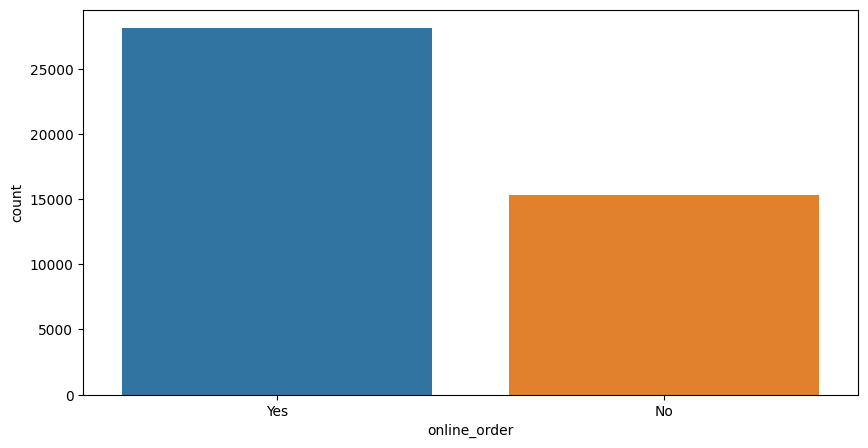

In [40]:
# 1) How many restaurants accpeting online order for zomato?

plt.figure(figsize=(10,5))
sns.countplot(x='online_order',data=zmt)
plt.show()

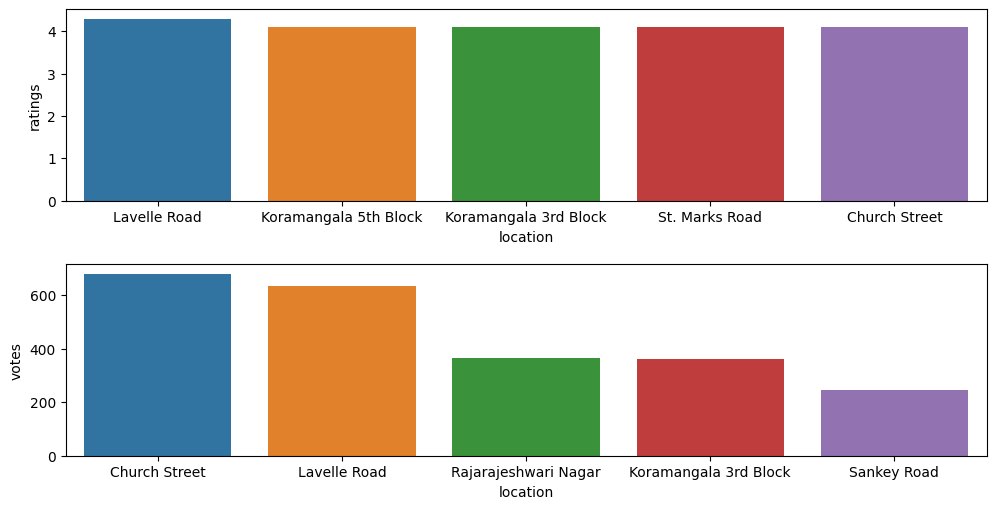

In [41]:
# 2) Find best location by seeing dataset.

# RATINGS
plt.figure(figsize=(10,5))
ax = plt.subplot(2,1,1)

loc_ratings = zmt.groupby('location').agg({'ratings':'median'})
loc_sorted_values = loc_ratings.sort_values('ratings',ascending=False).head(5).reset_index()

plt.tight_layout()
sns.barplot(x='location',y='ratings',data=loc_sorted_values)

# VOTES
ax = plt.subplot(2,1,2)
loc_votes = zmt.groupby('location').agg({'votes':'median'})
loc_votes_sorted = loc_votes.sort_values('votes',ascending=False).head(5).reset_index()

plt.tight_layout()
sns.barplot(x='location',y='votes',data=loc_votes_sorted)
plt.show()

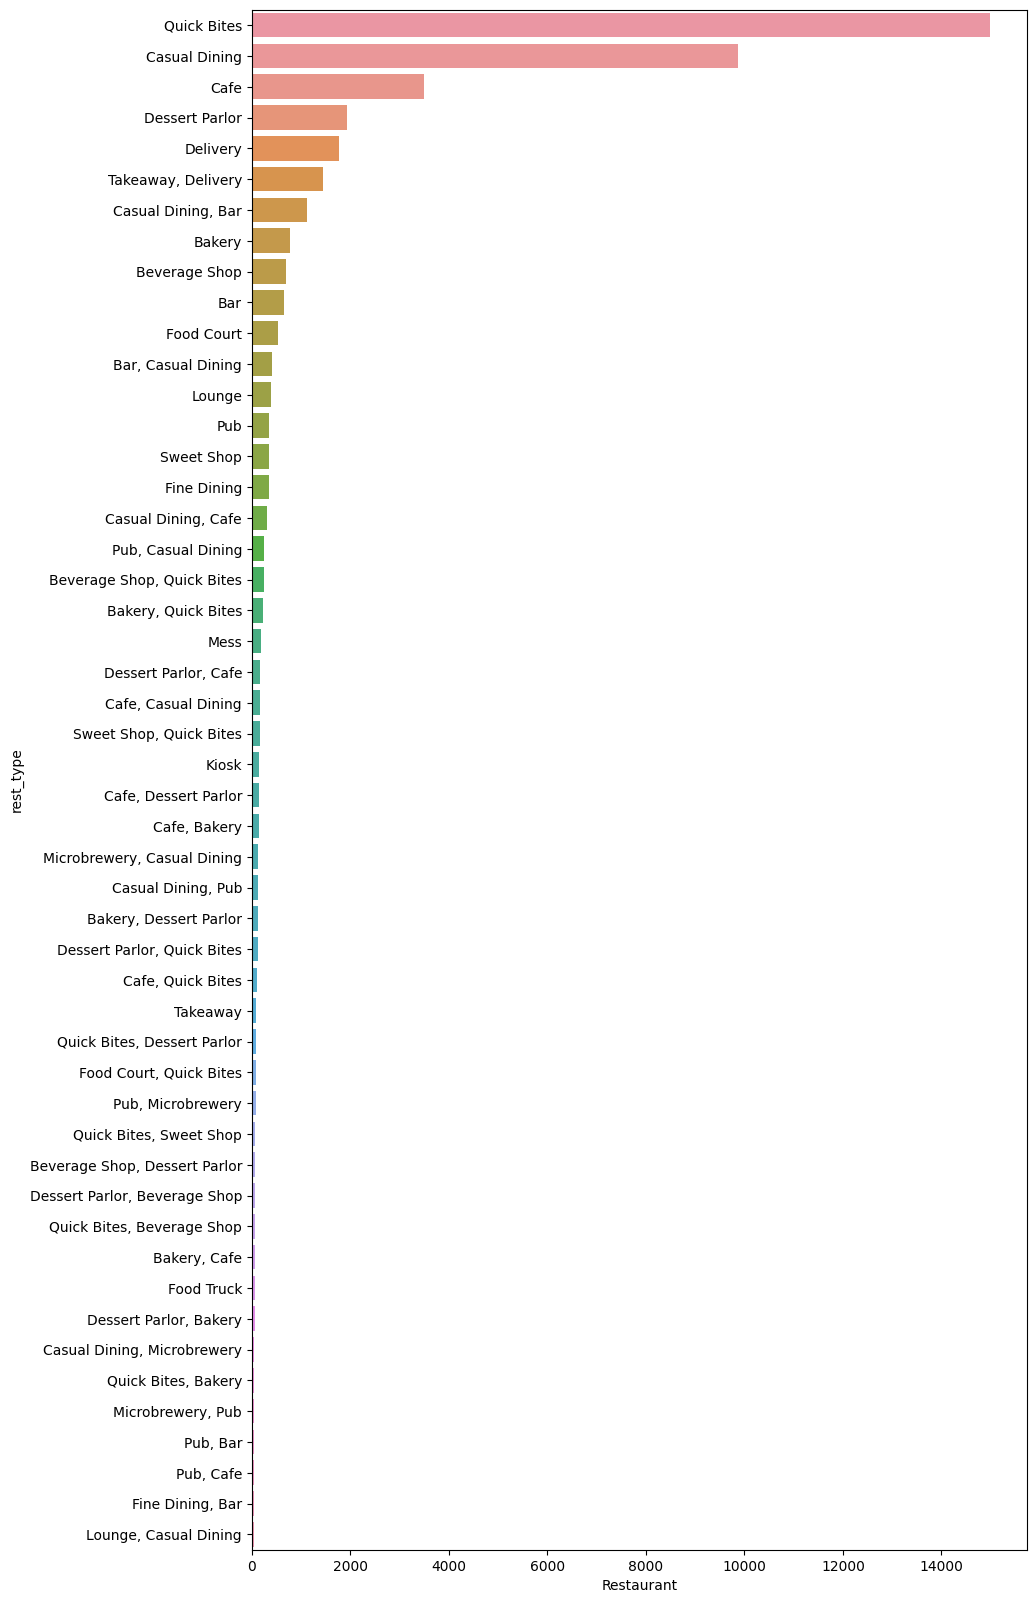

In [42]:
# 3) Find Types of restaurants and their count.

plt.figure(figsize=(10,20))

res_type = zmt.groupby('rest_type')['Restaurant'].count().reset_index()
sort_res_type = res_type.sort_values('Restaurant',ascending=False).head(50)

plt.tight_layout()
sns.barplot(x='Restaurant',y='rest_type',data=sort_res_type)
plt.show()

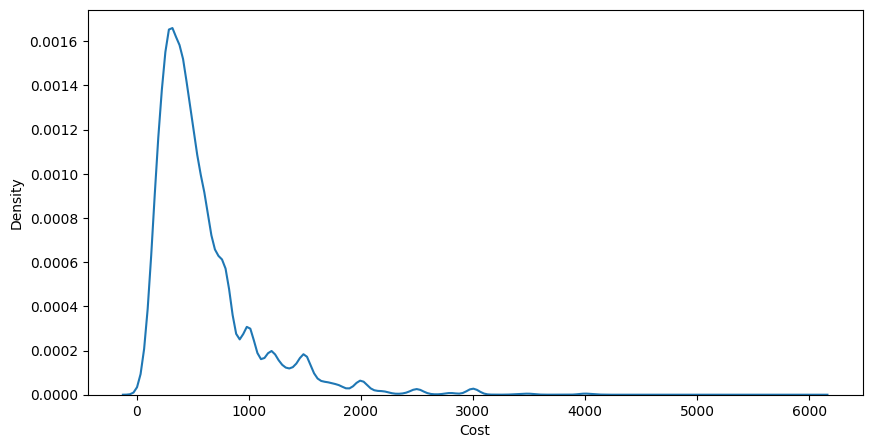

In [43]:
# Find cost of restaurant

plt.figure(figsize=(10,5))
sns.kdeplot(x='Cost',data=zmt)
plt.show()


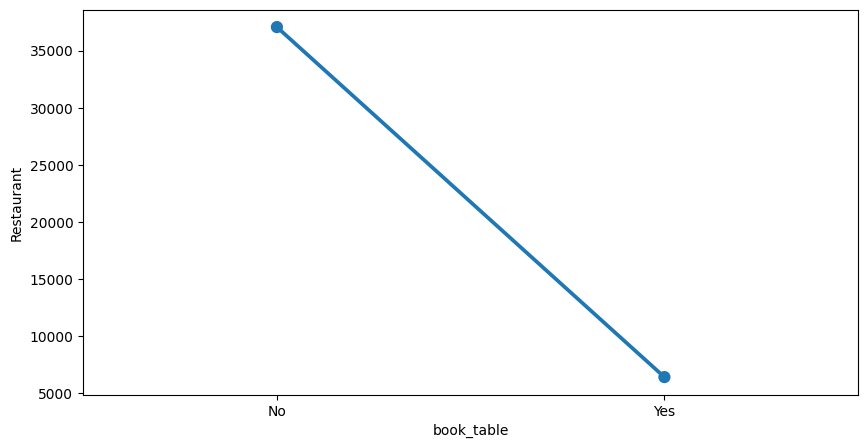

In [44]:
# 4) Find count of restaurants have table boking facility.

plt.figure(figsize=(10,5))
table_booking_res = zmt.groupby('book_table')['Restaurant'].count().reset_index()
sorted_table_booking_res = table_booking_res.sort_values('Restaurant',ascending=False).head(50)

plt.tight_layout()
sns.pointplot(x='book_table',y='Restaurant',data=sorted_table_booking_res)
plt.show()

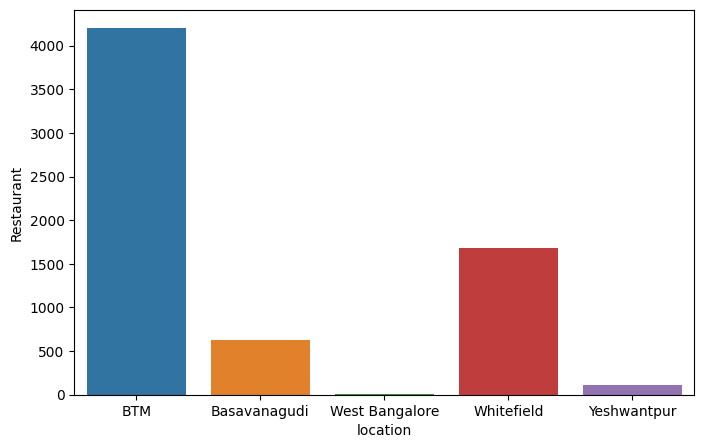

In [45]:
# 5) Find number of restaurant at given location.
# 'BTM'
# 'Basavanagudi'
# 'West Bangalore'
# 'Whitefield'
# 'Yeshwantpur'

plt.figure(figsize=(8,5))

df = pd.DataFrame(zmt.groupby('location')['Restaurant'].count()).reset_index()
sort_loc_res = df['location'].isin(['BTM','Basavanagudi','West Bangalore','Whitefield','Yeshwantpur'])

plt.tight_layout()
sns.barplot(x='location',y='Restaurant',data=df[sort_loc_res])
plt.show()

In [46]:
# 6) Find most famous restaurants chains(like Franchise(Restaurants having more than one branch) in Bangalore.
df1 = pd.DataFrame(zmt.groupby(['location','Restaurant','ratings']).count()).reset_index()
# sort_df1 = df1.sort_values(['ratings','location'],ascending=[False,True])
df1



,location,Restaurant,ratings,online_order,book_table,votes,rest_type,cuisines,Cost,Type,City
0,BTM,,3.7,3,3,3,3,3,3,3,3
1,BTM,2nd Home Restaurant,3.7,11,11,11,11,11,11,11,11
2,BTM,36th Cross Coffee Mane,3.7,1,1,1,1,1,1,1,1
3,BTM,"3B's - Buddies, Bar & Barbecues",4.4,13,13,13,13,13,13,13,13
4,BTM,A2B - Adyar Ananda Bhavan,3.8,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
12606,Yeshwantpur,The Cupcake Story,3.5,1,1,1,1,1,1,1,1
12607,Yeshwantpur,The Duke Of Juices,3.3,1,1,1,1,1,1,1,1
12608,Yeshwantpur,Tuckinto,3.8,2,2,2,2,2,2,2,2
12609,Yeshwantpur,Udupi Garden,3.0,2,2,2,2,2,2,2,2


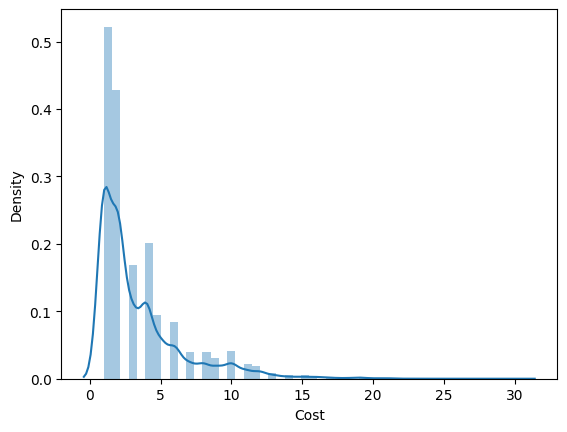

In [47]:
sns.distplot(df1['Cost'])
plt.show()

In [48]:
# Note that all columns having some count values these are nothing but a count of that restaurant at given location.
# We can see some restaurants having 1 count and some having more than 1. We want that restaurants which having more than 1 count and high rating.

chains_restaurant = df1[df1['book_table']>1]
famous_res = pd.DataFrame(chains_restaurant.groupby('location')[['Restaurant','ratings']].max()).reset_index()
famous_res



,location,Restaurant,ratings
0,BTM,eat.fit,4.9
1,Banashankari,Yo Roll Corner,4.6
2,Banaswadi,Zam Zam Restaurant,4.0
3,Bannerghatta Road,Zhangs Classic,4.6
4,Basavanagudi,Zephyr,4.6
...,...,...,...
84,West Bangalore,FreshMenu,3.3
85,Whitefield,nu.tree,4.9
86,Wilson Garden,Vijaya Sagar,4.0
87,Yelahanka,Prashanth Naati Corner,3.9


Finally, we got restaurant at each location has more that one branch and highest rating. Total 89 result we got. Let's try to plot only first 5 to get idea.

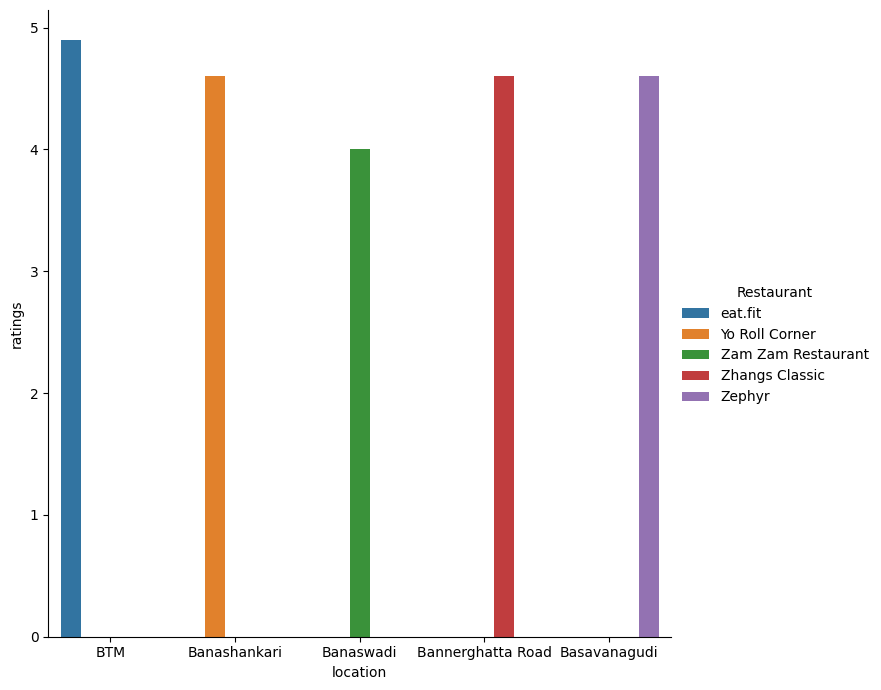

In [49]:

sns.catplot(x='location',y='ratings',hue='Restaurant',kind='bar',height=7,data=famous_res.head(5))
plt.show()

<Figure size 640x480 with 0 Axes>

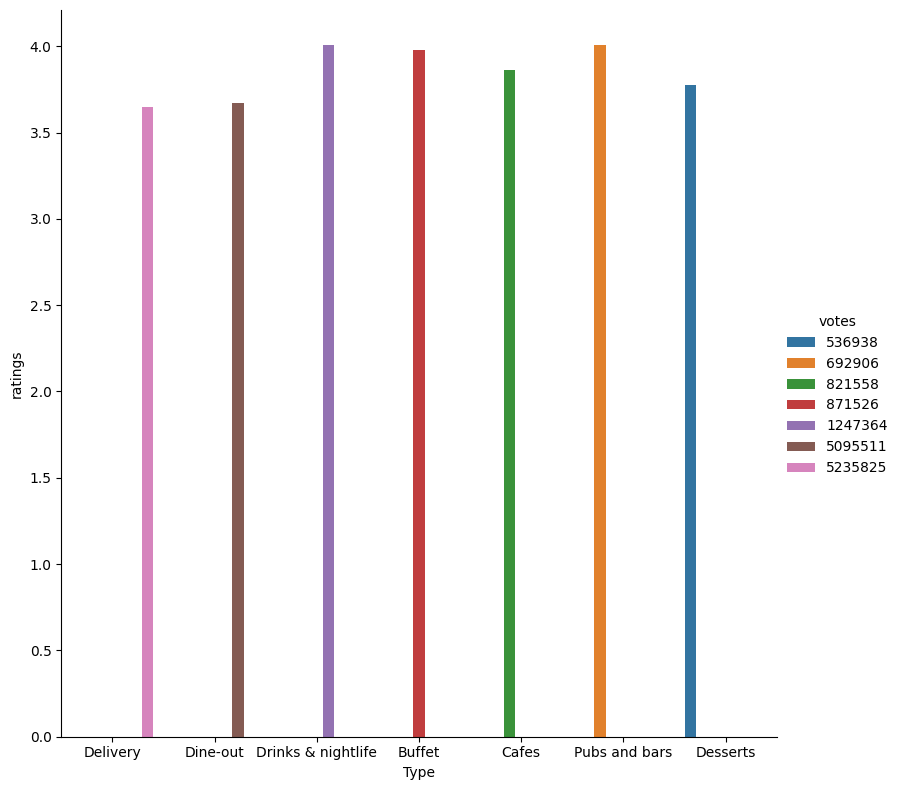

In [56]:
# 7) Find how many voters gives rating for each 'type' and aggregate rating of that 'type'.

count_votes = zmt.groupby('Type').agg({'votes':'sum','ratings':'mean'}).nlargest(7,['votes']).reset_index()
plt.tight_layout()
sns.catplot(x='Type',y='ratings',hue='votes',kind='bar',height=8,data=count_votes)
plt.show()


<Axes: xlabel='ratings', ylabel='Density'>

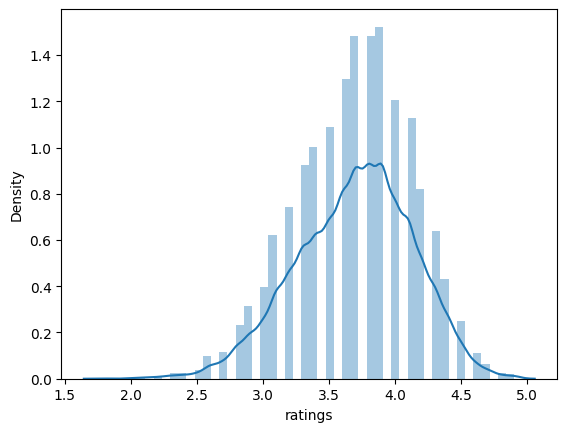

In [57]:
# 8) Gaussian Rest Type(Normal Distribution) of Rating.

sns.distplot(zmt['ratings'])

In [77]:
# 9) Find the how many Restaurants havign Chinese and North Indian food in their food type.

Chinese = len([i for i in zmt['cuisines'] if 'Chinese' in i])
North_Indian = len([i for i in zmt['cuisines'] if 'North Indian' in i])

Restaurant_count = [Chinese,North_Indian]
Cuisines = ['Chinese','North_Indian']

df3 = pd.DataFrame({'cuisines':Cuisines,'Restaurant_count':Restaurant_count})


[]

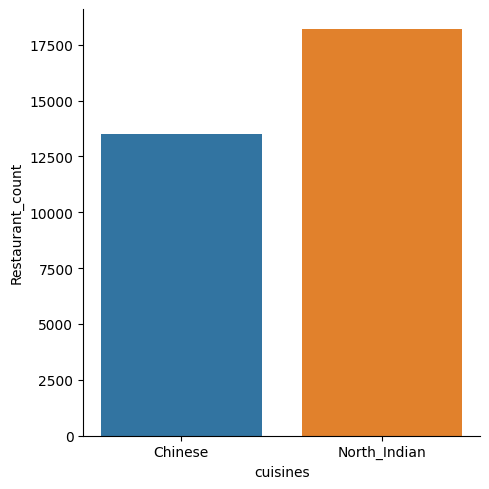

In [79]:
sns.catplot(x='cuisines',y='Restaurant_count',kind='bar',data=df3)
plt.plot()

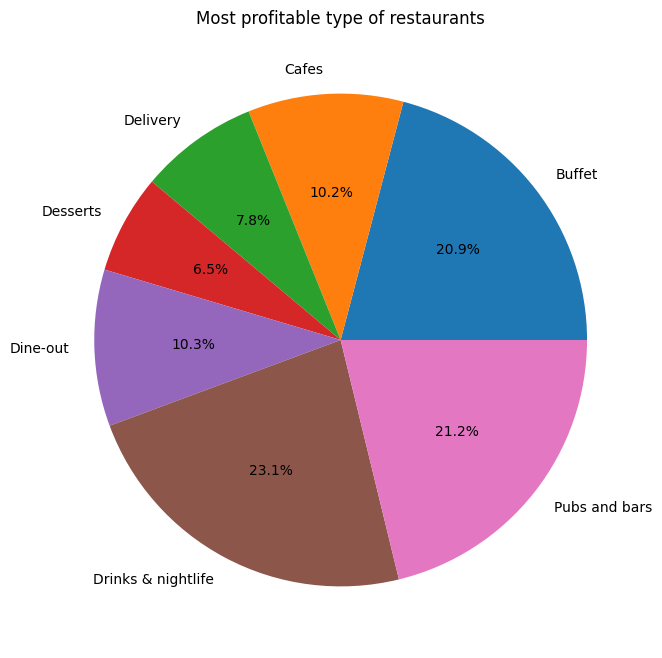

In [102]:
# 10) Find the most profitable type of restaurant.

profitable_res = zmt.groupby('Type').agg({'Cost':'mean'})

plt.figure(figsize=(8,8))
plt.pie(profitable_res['Cost'],labels=profitable_res.index,autopct='%1.1f%%')
plt.title('Most profitable type of restaurants')
plt.show()

# 